# 4. Mushroom foraging

The [mushroom dataset](https://www.kaggle.com/datasets/dhinaharp/mushroom-dataset) contains data about approximately 60000 mushrooms, and your task is to classify them as either edible or poisonous. You can read about the features [here](https://www.kaggle.com/datasets/uciml/mushroom-classification) and import the data using:

In [1]:
#import pandas as pd
#pd.set_option('display.max_columns', 1000)
#df = pd.read_csv('secondary_data.csv', delimiter = ';')
#df.head()

It's up to you how you approach this data, but at a minimum, your analysis should include:

* Informed **data preparation**.
* 2 different classification models, one of which must be **logistic regression**.
* A discussion of which **performance metric** is most relevant for the evaluation of your models.
* 2 different **validation methodologies** used to tune hyperparameters.
* **Confusion matrices** for your models, and associated comments.

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

## Data Preparation:

In [3]:
# Load the raw data, and display it's head to get an overview of what data we have that needs preparation:
#pd.set_option('display.max_columns', 1000)
df = pd.read_csv('secondary_data.csv', delimiter = ';')
with pd.option_context('display.max_rows', 200):
  display(df.head(10))

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


The data set described a number of columns with both binary and non-binary values. We need to convert these to a numerical value that we can use for training. The class descriptions are described in the linked dataset, but I will briefly explain what I intend to do with each of these columns, below:

| Feature / Column  | Description                                                                                                                                                                                                                                                                                                                                                                                                    |
|:-----------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Class             | A binary value that is either p (poisonous) or e (edible). This should be converted to a binary value so 0 is poisonous and 1 is edible. This will also be the prediction 'target'.                                                                                                                                                                                                                            |
| Cap-diameter      | float number in cm expressing the diameter size of each mushroom. This is likely not relevant for determining if something is edible and will probably be removed from the dataset for training.                                                                                                                                                                                                               |
| Cap-shape         | Uses a single letter to describe the shape of a mushroom. This is likely correlated with the edibility of a mushroom. Will probably need to be converted into true/false columns for each shape type. The shapes are; b (bell), c (conical), x (convex, f (flat), s (sunken), p (spherical), o (others).                                                                                                       |
| Cap-surface       | Uses a single letter to describe the surface of a mushroom. This likely correlates with the edibility of a mushroom. Will probably need to be converted into true/false columns for each surface type. The types are; i (fibrous), g (grooves), y (scaly), s (smooth), h (shiny), l (leathery), k (silky), t (sticky), w (wrinkled), e (fleshy).                                                               |
| Cap-color         | Uses a single letter to describe the color of a mushroom. This likely correlates with the edibility of a mushroom. Will probably need to be converted into true/false columns for each type. The colors are; n (brown), b (buff), g (grey), r (green), p (pink), u (purple), e (red), w (white), y (yellow), l (blue), o (orange), k (black).                                                                  |
| does-bruise-bleed | Uses a binary value to describe whether a mushroom bruises/bleeds or not. I have no initial idea of whether this correlates with edibility - so it should be included as a feature. Will probably need to be converted into true/false columns for each type. Values are; t (bruises-or-bleeding), f (no bruising or bleeding).                                                                                |
| gill-attachment   | Uses a single letter to describe the color of a mushroom. I have no initial idea of whether this correlates with edibility - so it should be included as a feature. Will probably need to be converted into true/false columns for each type. The types are; a (adnate), x (adnexed), d (decurrent), e (free), s (sinuate), p (pores), f (none), ? (unknown).                                                  |
| gill-sparing      | The data set largely doesn't describe this feature. It is blank (NaN), and thus this column will likely simply be removed. The documentation describes that this should use letters to describe the spacing of the gills on each mushroom, with values being; c (close), d (distant), f (none).                                                                                                                |
| gill-color        | Uses a single letter to describe the color of the gills on a mushroom. This likely correlates with the edibility of a mushroom. Will probably need to be converted into true/false columns for each type. The colors are; n (brown), b (buff), g (grey), r (green), p (pink), u (purple), e (red), w (white), y (yellow), l (blue), o (orange), k (black), f (none).                                           |
| Stem-height       | float number in cm expressing the stem height of each mushroom. This is likely not relevant for determining if something is edible and will probably be removed from the dataset for training.                                                                                                                                                                                                                 |
| Stem-width        | float number in mm expressing the stem width of each mushroom. This is likely not relevant for determining if something is edible and will probably be removed from the dataset for training.                                                                                                                                                                                                                  |
| stem-root         | Uses a single letter to describe the root of a mushroom. This likely correlates with the edibility of a mushroom. Will probably need to be converted into true/false columns for each type. The types are; b (bulbous), s (swollen), c (club), u (cup), e (equal), z (rhizomorphs), r (rooted).                                                                                                                |
| stem-surface      | Uses a single letter to describe the surface of the stem on a mushroom. This likely correlates with the edibility of a mushroom. Will probably need to be converted into true/false columns for each surface type. The types are; i (fibrous), g (grooves), y (scaly), s (smooth), h (shiny), l (leathery), k (silky), t (sticky), w (wrinkled), e (fleshy), f (none).                                         |
| stem-color        | Uses a single letter to describe the color of the stem on a mushroom. This likely correlates with the edibility of a mushroom. Will probably need to be converted into true/false columns for each type. The colors are; n (brown), b (buff), g (grey), r (green), p (pink), u (purple), e (red), w (white), y (yellow), l (blue), o (orange), k (black), f (none).                                            |
| veil-type         | Uses a binary value to describe the veil type of a mushroom. I have no initial idea of whether this correlates with edibility - so it should be included as a feature. Will probably need to be converted into true/false columns for each type. Values are; p (partial), f (universal).                                                                                                                       |
| veil-color        | Uses a single letter to describe the color of the veil on a mushroom. This likely correlates with the edibility of a mushroom. Will probably need to be converted into true/false columns for each type. The colors are; n (brown), b (buff), g (grey), r (green), p (pink), u (purple), e (red), w (white), y (yellow), l (blue), o (orange), k (black), f (none).                                            |
| has-ring          | Uses a binary value to describe if a mushroom has a ring or not. This likely correlates with edibility - so it should be included as a feature. Since the next feature (ring-type) is reliant upon this value, I believe this feature is unneeded - as it is already a pre-requisite for the ring-type parameter. It should be removed from the data set before training. Values are; t (ring), f (none).      |
| ring-type         | Uses a single letter to describe the ring type on a mushroom. This likely correlates with the edibility of a mushroom. Will probably need to be converted into true/false columns for each type. The types are; c (cobwebby), e (evanescent), r (flaring), g (grooved), l (large), p (pendant), s (sheathing), z (zone), y (scaly), movable (m), f (none), ? (unknown).                                        |
| spore-print-color | Uses a single letter to describe the color of the spores from a mushroom. I have no initial idea of whether this correlates with edibility - so it should be included as a feature. Will probably need to be converted into true/false columns for each type. The colors are; n (brown), b (buff), g (grey), r (green), p (pink), u (purple), e (red), w (white), y (yellow), l (blue), o (orange), k (black). |
| habitat           | Uses a single letter to describe the habitat a mushroom is found in. This likely correlates with the edibility of a mushroom. Will probably need to be converted into true/false columns for each type. The types are; g (grasses), l (leaves), m (meadows), p (paths), h (heaths), u (urban), w (waste), d (woods).                                                                                           |
| season            | Uses a single letter to describe the season a mushroom is found in. I have no initial idea of whether this correlates with edibility - so it should be included as a feature.Will probably need to be converted into true/false columns for each type. The types are; s (spring), u (summer), a (autumn), w (winter).   |

### Let's begin cleaning up the data:

Since I can see that several columns contain NaN values I'm interested in seeing exactly how many data entries in each column are NOT NaN values. Columns with 0 non NaN values are prime targets for culling.


In [4]:
# column: cap-diameter
print(f"Non NaN values in column 'cap-diameter'        : {df['cap-diameter'].notna().sum()} vs {df['cap-diameter'].isna().sum()} NaN values" )

# column: cap-shape
print(f"Non NaN values in column 'cap-shape'           : {df['cap-shape'].notna().sum()} vs {df['cap-shape'].isna().sum()} NaN values" )

# column: cap-surface
print(f"Non NaN values in column 'cap-surface'         : {df['cap-surface'].notna().sum()} vs {df['cap-surface'].isna().sum()} NaN values" )

# column: cap-color
print(f"Non NaN values in column 'cap-color'           : {df['cap-color'].notna().sum()} vs {df['cap-color'].isna().sum()} NaN values" )

# column: does-bruise-or-bleed
print(f"Non NaN values in column 'does-bruise-or-bleed': {df['does-bruise-or-bleed'].notna().sum()} vs {df['does-bruise-or-bleed'].isna().sum()} NaN values" )

# column: gill-attachment
print(f"Non NaN values in column 'gill-attachment'     : {df['gill-attachment'].notna().sum()} vs {df['gill-attachment'].isna().sum()} NaN values" )

# column: gill-spacing
print(f"Non NaN values in column 'gill-spacing'        : {df['gill-spacing'].notna().sum()} vs {df['gill-spacing'].isna().sum()} NaN values" )

# column: gill-color
print(f"Non NaN values in column 'gill-color'          : {df['gill-color'].notna().sum()} vs {df['gill-color'].isna().sum()} NaN values" )

# column: stem-height
print(f"Non NaN values in column 'stem-height'         : {df['stem-height'].notna().sum()} vs {df['stem-height'].isna().sum()} NaN values" )

# column: stem-width
print(f"Non NaN values in column 'stem-width'          : {df['stem-width'].notna().sum()} vs {df['stem-width'].isna().sum()} NaN values" )

# column: stem-root
print(f"Non NaN values in column 'stem-root'           : {df['stem-root'].notna().sum()} vs {df['stem-root'].isna().sum()} NaN values" )

# column: stem-surface
print(f"Non NaN values in column 'stem-surface'        : {df['stem-surface'].notna().sum()} vs {df['stem-surface'].isna().sum()} NaN values" )

# column: stem-color
print(f"Non NaN values in column 'stem-color'          : {df['stem-color'].notna().sum()} vs {df['stem-color'].isna().sum()} NaN values" )

# column: veil-type
print(f"Non NaN values in column 'veil-type'           : {df['veil-type'].notna().sum()} vs {df['veil-type'].isna().sum()} NaN values" )

# column: veil-color
print(f"Non NaN values in column 'veil-color'          : {df['veil-color'].notna().sum()} vs {df['veil-color'].isna().sum()} NaN values" )

# column: has-ring
print(f"Non NaN values in column 'has-ring'            : {df['has-ring'].notna().sum()} vs {df['has-ring'].isna().sum()} NaN values" )

# column: ring-type
print(f"Non NaN values in column 'ring-type'           : {df['ring-type'].notna().sum()} vs {df['ring-type'].isna().sum()} NaN values" )

# column: spore-print-color
print(f"Non NaN values in column 'spore-print-color'   : {df['spore-print-color'].notna().sum()} vs {df['spore-print-color'].isna().sum()} NaN values" )

# column: habitat
print(f"Non NaN values in column 'habitat'             : {df['habitat'].notna().sum()} vs {df['habitat'].isna().sum()} NaN values" )

# column: season
print(f"Non NaN values in column 'season'              : {df['season'].notna().sum()} vs {df['season'].isna().sum()} NaN values" )

Non NaN values in column 'cap-diameter'        : 61069 vs 0 NaN values
Non NaN values in column 'cap-shape'           : 61069 vs 0 NaN values
Non NaN values in column 'cap-surface'         : 46949 vs 14120 NaN values
Non NaN values in column 'cap-color'           : 61069 vs 0 NaN values
Non NaN values in column 'does-bruise-or-bleed': 61069 vs 0 NaN values
Non NaN values in column 'gill-attachment'     : 51185 vs 9884 NaN values
Non NaN values in column 'gill-spacing'        : 36006 vs 25063 NaN values
Non NaN values in column 'gill-color'          : 61069 vs 0 NaN values
Non NaN values in column 'stem-height'         : 61069 vs 0 NaN values
Non NaN values in column 'stem-width'          : 61069 vs 0 NaN values
Non NaN values in column 'stem-root'           : 9531 vs 51538 NaN values
Non NaN values in column 'stem-surface'        : 22945 vs 38124 NaN values
Non NaN values in column 'stem-color'          : 61069 vs 0 NaN values
Non NaN values in column 'veil-type'           : 3177 vs 57

I can clearly see that simply removing all NaN values is not a very good solution. I would end up with less than 3177 data entries (out of 61069) if I used that strategy.

The strategy will be to instead introduce new columns for each column that has NaN value, where I simply describe the feature as unknown.


### Now let's build the cleaned data:

In [5]:
# Make a copy of the uncleaned data.
cleaned_raw_data = df

# Convert class into binary true/false columns: poisonous=p, edibile=e
cleaned_raw_data['isEdible'] = cleaned_raw_data['class'] == 'e'
cleaned_raw_data = cleaned_raw_data.drop(columns='class')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert cap-shape into binary true/false columns: bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
cleaned_raw_data['cap-shape-is-bell'] = cleaned_raw_data['cap-shape'] == 'b'
cleaned_raw_data['cap-shape-is-conical'] = cleaned_raw_data['cap-shape'] == 'c'
cleaned_raw_data['cap-shape-is-convex'] = cleaned_raw_data['cap-shape'] == 'x'
cleaned_raw_data['cap-shape-is-flat'] = cleaned_raw_data['cap-shape'] == 'f'
cleaned_raw_data['cap-shape-is-sunken'] = cleaned_raw_data['cap-shape'] == 's'
cleaned_raw_data['cap-shape-is-spherical'] = cleaned_raw_data['cap-shape'] == 'p'
cleaned_raw_data['cap-shape-is-others'] = cleaned_raw_data['cap-shape'] == 'o'
cleaned_raw_data = cleaned_raw_data.drop(columns='cap-shape')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert cap-surface into binary true/false columns: fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
cleaned_raw_data['cap-surface-is-fibrous'] = cleaned_raw_data['cap-surface'] == 'i'
cleaned_raw_data['cap-surface-is-grooves'] = cleaned_raw_data['cap-surface'] == 'g'
cleaned_raw_data['cap-surface-is-scaly'] = cleaned_raw_data['cap-surface'] == 'y'
cleaned_raw_data['cap-surface-is-smooth'] = cleaned_raw_data['cap-surface'] == 's'
cleaned_raw_data['cap-surface-is-shiny'] = cleaned_raw_data['cap-surface'] == 'h'
cleaned_raw_data['cap-surface-is-leathery'] = cleaned_raw_data['cap-surface'] == 'l'
cleaned_raw_data['cap-surface-is-silky'] = cleaned_raw_data['cap-surface'] == 'k'
cleaned_raw_data['cap-surface-is-sticky'] = cleaned_raw_data['cap-surface'] == 't'
cleaned_raw_data['cap-surface-is-wrinkled'] = cleaned_raw_data['cap-surface'] == 'w'
cleaned_raw_data['cap-surface-is-fleshy'] = cleaned_raw_data['cap-surface'] == 'e'
cleaned_raw_data['cap-surface-is-unknown'] = cleaned_raw_data['cap-surface'].isna()
cleaned_raw_data = cleaned_raw_data.drop(columns='cap-surface')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert cap-color into binary true/false columns: brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k
cleaned_raw_data['cap-color-is-brown'] = cleaned_raw_data['cap-color'] == 'n'
cleaned_raw_data['cap-color-is-buff'] = cleaned_raw_data['cap-color'] == 'b'
cleaned_raw_data['cap-color-is-gray'] = cleaned_raw_data['cap-color'] == 'g'
cleaned_raw_data['cap-color-is-green'] = cleaned_raw_data['cap-color'] == 'r'
cleaned_raw_data['cap-color-is-pink'] = cleaned_raw_data['cap-color'] == 'p'
cleaned_raw_data['cap-color-is-purple'] = cleaned_raw_data['cap-color'] == 'u'
cleaned_raw_data['cap-color-is-red'] = cleaned_raw_data['cap-color'] == 'e'
cleaned_raw_data['cap-color-is-white'] = cleaned_raw_data['cap-color'] == 'w'
cleaned_raw_data['cap-color-is-yellow'] = cleaned_raw_data['cap-color'] == 'y'
cleaned_raw_data['cap-color-is-blue'] = cleaned_raw_data['cap-color'] == 'l'
cleaned_raw_data['cap-color-is-orange'] = cleaned_raw_data['cap-color'] == 'o'
cleaned_raw_data['cap-color-is-black'] = cleaned_raw_data['cap-color'] == 'k'
cleaned_raw_data = cleaned_raw_data.drop(columns='cap-color')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert does-bruise-or-bleed into binary true/false column: bruises-or-bleeding=t,no=f
cleaned_raw_data['does-bruise-or-bleed_'] = cleaned_raw_data['does-bruise-or-bleed'] == 't'
cleaned_raw_data = cleaned_raw_data.drop(columns='does-bruise-or-bleed')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert gill-attachment into binary true/false columns: adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
cleaned_raw_data['gill-attachment-is-adnate'] = cleaned_raw_data['gill-attachment'] == 'a'
cleaned_raw_data['gill-attachment-is-adnexed'] = cleaned_raw_data['gill-attachment'] == 'x'
cleaned_raw_data['gill-attachment-is-decurrent'] = cleaned_raw_data['gill-attachment'] == 'd'
cleaned_raw_data['gill-attachment-is-free'] = cleaned_raw_data['gill-attachment'] == 'e'
cleaned_raw_data['gill-attachment-is-sinuate'] = cleaned_raw_data['gill-attachment'] == 's'
cleaned_raw_data['gill-attachment-is-pores'] = cleaned_raw_data['gill-attachment'] == 'p'
cleaned_raw_data['gill-attachment-is-none'] = cleaned_raw_data['gill-attachment'] == 'f'
cleaned_raw_data['gill-attachment-is-unknown'] = (cleaned_raw_data['gill-attachment'] == '?') | (cleaned_raw_data['gill-attachment'].isna())
cleaned_raw_data = cleaned_raw_data.drop(columns='gill-attachment')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert gill-spacing into binary true/false columns: close=c, distant=d, none=f
cleaned_raw_data['gill-spacing-is-close'] = cleaned_raw_data['gill-spacing'] == 'c'
cleaned_raw_data['gill-spacing-is-distant'] = cleaned_raw_data['gill-spacing'] == 'd'
cleaned_raw_data['gill-spacing-is-none'] = cleaned_raw_data['gill-spacing'] == 'f'
cleaned_raw_data['gill-spacing-is-unknown'] = cleaned_raw_data['gill-spacing'].isna()
cleaned_raw_data = cleaned_raw_data.drop(columns='gill-spacing')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert gill-color into binary true/false columns: brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k & none=f
cleaned_raw_data['gill-color-is-brown'] = cleaned_raw_data['gill-color'] == 'n'
cleaned_raw_data['gill-color-is-buff'] = cleaned_raw_data['gill-color'] == 'b'
cleaned_raw_data['gill-color-is-gray'] = cleaned_raw_data['gill-color'] == 'g'
cleaned_raw_data['gill-color-is-green'] = cleaned_raw_data['gill-color'] == 'r'
cleaned_raw_data['gill-color-is-pink'] = cleaned_raw_data['gill-color'] == 'p'
cleaned_raw_data['gill-color-is-purple'] = cleaned_raw_data['gill-color'] == 'u'
cleaned_raw_data['gill-color-is-red'] = cleaned_raw_data['gill-color'] == 'e'
cleaned_raw_data['gill-color-is-white'] = cleaned_raw_data['gill-color'] == 'w'
cleaned_raw_data['gill-color-is-yellow'] = cleaned_raw_data['gill-color'] == 'y'
cleaned_raw_data['gill-color-is-blue'] = cleaned_raw_data['gill-color'] == 'l'
cleaned_raw_data['gill-color-is-orange'] = cleaned_raw_data['gill-color'] == 'o'
cleaned_raw_data['gill-color-is-black'] = cleaned_raw_data['gill-color'] == 'k'
cleaned_raw_data['gill-color-is-none'] = cleaned_raw_data['gill-color'] == 'f'
cleaned_raw_data = cleaned_raw_data.drop(columns='gill-color')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert stem-root into binary true/false columns:  bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
cleaned_raw_data['stem-root-is-bulbous'] = cleaned_raw_data['stem-root'] == 'b'
cleaned_raw_data['stem-root-is-swollen'] = cleaned_raw_data['stem-root'] == 's'
cleaned_raw_data['stem-root-is-club'] = cleaned_raw_data['stem-root'] == 'c'
cleaned_raw_data['stem-root-is-cup'] = cleaned_raw_data['stem-root'] == 'u'
cleaned_raw_data['stem-root-is-equal'] = cleaned_raw_data['stem-root'] == 'e'
cleaned_raw_data['stem-root-is-rhizomorphs'] = cleaned_raw_data['stem-root'] == 'z'
cleaned_raw_data['stem-root-is-rooted'] = cleaned_raw_data['stem-root'] == 'r'
cleaned_raw_data['stem-root-is-unknown'] = cleaned_raw_data['stem-root'].isna()
cleaned_raw_data = cleaned_raw_data.drop(columns='stem-root')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert stem-surface into binary true/false columns: fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e & none=f
cleaned_raw_data['stem-surface-is-fibrous'] = cleaned_raw_data['stem-surface'] == 'i'
cleaned_raw_data['stem-surface-is-grooves'] = cleaned_raw_data['stem-surface'] == 'g'
cleaned_raw_data['stem-surface-is-scaly'] = cleaned_raw_data['stem-surface'] == 'y'
cleaned_raw_data['stem-surface-is-smooth'] = cleaned_raw_data['stem-surface'] == 's'
cleaned_raw_data['stem-surface-is-shiny'] = cleaned_raw_data['stem-surface'] == 'h'
cleaned_raw_data['stem-surface-is-leathery'] = cleaned_raw_data['stem-surface'] == 'l'
cleaned_raw_data['stem-surface-is-silky'] = cleaned_raw_data['stem-surface'] == 'k'
cleaned_raw_data['stem-surface-is-sticky'] = cleaned_raw_data['stem-surface'] == 't'
cleaned_raw_data['stem-surface-is-wrinkled'] = cleaned_raw_data['stem-surface'] == 'w'
cleaned_raw_data['stem-surface-is-fleshy'] = cleaned_raw_data['stem-surface'] == 'e'
cleaned_raw_data['stem-surface-is-none'] = cleaned_raw_data['stem-surface'] == 'f'
cleaned_raw_data['stem-surface-is-unknown'] = cleaned_raw_data['stem-surface'].isna()
cleaned_raw_data = cleaned_raw_data.drop(columns='stem-surface')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert stem-color into binary true/false columns: brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k & none=f
cleaned_raw_data['stem-color-is-brown'] = cleaned_raw_data['stem-color'] == 'n'
cleaned_raw_data['stem-color-is-buff'] = cleaned_raw_data['stem-color'] == 'b'
cleaned_raw_data['stem-color-is-gray'] = cleaned_raw_data['stem-color'] == 'g'
cleaned_raw_data['stem-color-is-pink'] = cleaned_raw_data['stem-color'] == 'p'
cleaned_raw_data['stem-color-is-purple'] = cleaned_raw_data['stem-color'] == 'u'
cleaned_raw_data['stem-color-is-red'] = cleaned_raw_data['stem-color'] == 'e'
cleaned_raw_data['stem-color-is-white'] = cleaned_raw_data['stem-color'] == 'w'
cleaned_raw_data['stem-color-is-yellow'] = cleaned_raw_data['stem-color'] == 'y'
cleaned_raw_data['stem-color-is-blue'] = cleaned_raw_data['stem-color'] == 'l'
cleaned_raw_data['stem-color-is-orange'] = cleaned_raw_data['stem-color'] == 'o'
cleaned_raw_data['stem-color-is-black'] = cleaned_raw_data['stem-color'] == 'k'
cleaned_raw_data['stem-color-is-none'] = cleaned_raw_data['stem-color'] == 'f'
cleaned_raw_data = cleaned_raw_data.drop(columns='stem-color')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert veil-type into binary true/false column: partial=p, universal=u
cleaned_raw_data['veil-type-is-universal'] = cleaned_raw_data['veil-type'] == 'u'
cleaned_raw_data['veil-type-is-partial'] = cleaned_raw_data['veil-type'] == 'p'
cleaned_raw_data['veil-type-is-unknown'] = cleaned_raw_data['veil-type'].isna()
cleaned_raw_data = cleaned_raw_data.drop(columns='veil-type')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert veil-color into binary true/false columns: brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k & none=f
cleaned_raw_data['veil-color-is-brown'] = cleaned_raw_data['veil-color'] == 'n'
cleaned_raw_data['veil-color-is-gray'] = cleaned_raw_data['veil-color'] == 'g'
cleaned_raw_data['veil-color-is-green'] = cleaned_raw_data['veil-color'] == 'r'
cleaned_raw_data['veil-color-is-pink'] = cleaned_raw_data['veil-color'] == 'p'
cleaned_raw_data['veil-color-is-purple'] = cleaned_raw_data['veil-color'] == 'u'
cleaned_raw_data['veil-color-is-red'] = cleaned_raw_data['veil-color'] == 'e'
cleaned_raw_data['veil-color-is-white'] = cleaned_raw_data['veil-color'] == 'w'
cleaned_raw_data['veil-color-is-yellow'] = cleaned_raw_data['veil-color'] == 'y'
cleaned_raw_data['veil-color-is-blue'] = cleaned_raw_data['veil-color'] == 'l'
cleaned_raw_data['veil-color-is-orange'] = cleaned_raw_data['veil-color'] == 'o'
cleaned_raw_data['veil-color-is-black'] = cleaned_raw_data['veil-color'] == 'k'
cleaned_raw_data['veil-color-is-none'] = cleaned_raw_data['veil-color'] == 'f'
cleaned_raw_data['veil-color-is-unknown'] = cleaned_raw_data['veil-color'].isna()
cleaned_raw_data = cleaned_raw_data.drop(columns='veil-color')
cleaned_raw_data = cleaned_raw_data.copy()

# Drop the has-ring column, since the ring-type column is directly dependent on this. This is to avoid features "counting twice" or being weighed heavier than their peers during training.
cleaned_raw_data = cleaned_raw_data.drop(columns='has-ring')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert ring-type into binary true/false columns: cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
cleaned_raw_data['ring-type-is-cobwebby'] = cleaned_raw_data['ring-type'] == 'c'
cleaned_raw_data['ring-type-is-evanescent'] = cleaned_raw_data['ring-type'] == 'e'
cleaned_raw_data['ring-type-is-flaring'] = cleaned_raw_data['ring-type'] == 'r'
cleaned_raw_data['ring-type-is-grooved'] = cleaned_raw_data['ring-type'] == 'g'
cleaned_raw_data['ring-type-is-large'] = cleaned_raw_data['ring-type'] == 'l'
cleaned_raw_data['ring-type-is-pendant'] = cleaned_raw_data['ring-type'] == 'p'
cleaned_raw_data['ring-type-is-sheathing'] = cleaned_raw_data['ring-type'] == 's'
cleaned_raw_data['ring-type-is-zone'] = cleaned_raw_data['ring-type'] == 'z'
cleaned_raw_data['ring-type-is-scaly'] = cleaned_raw_data['ring-type'] == 'y'
cleaned_raw_data['ring-type-is-movable'] = cleaned_raw_data['ring-type'] == 'm'
cleaned_raw_data['ring-type-is-none'] = cleaned_raw_data['ring-type'] == 'f'
cleaned_raw_data['ring-type-is-unknown'] = (cleaned_raw_data['ring-type'] == '?') | (cleaned_raw_data['ring-type'].isna())
cleaned_raw_data = cleaned_raw_data.drop(columns='ring-type')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert spore-print-color into binary true/false columns: brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o & black=k
cleaned_raw_data['spore-print-color-is-brown'] = cleaned_raw_data['spore-print-color'] == 'n'
cleaned_raw_data['spore-print-color-is-buff'] = cleaned_raw_data['spore-print-color'] == 'b'
cleaned_raw_data['spore-print-color-is-gray'] = cleaned_raw_data['spore-print-color'] == 'g'
cleaned_raw_data['spore-print-color-is-green'] = cleaned_raw_data['spore-print-color'] == 'r'
cleaned_raw_data['spore-print-color-is-pink'] = cleaned_raw_data['spore-print-color'] == 'p'
cleaned_raw_data['spore-print-color-is-purple'] = cleaned_raw_data['spore-print-color'] == 'u'
cleaned_raw_data['spore-print-color-is-red'] = cleaned_raw_data['spore-print-color'] == 'e'
cleaned_raw_data['spore-print-color-is-white'] = cleaned_raw_data['spore-print-color'] == 'w'
cleaned_raw_data['spore-print-color-is-yellow'] = cleaned_raw_data['spore-print-color'] == 'y'
cleaned_raw_data['spore-print-color-is-blue'] = cleaned_raw_data['spore-print-color'] == 'l'
cleaned_raw_data['spore-print-color-is-orange'] = cleaned_raw_data['spore-print-color'] == 'o'
cleaned_raw_data['spore-print-color-is-black'] = cleaned_raw_data['spore-print-color'] == 'k'
cleaned_raw_data['spore-print-color-is-unknown'] = cleaned_raw_data['spore-print-color'].isna()
cleaned_raw_data = cleaned_raw_data.drop(columns='spore-print-color')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert habitat into binary true/false columns: grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
cleaned_raw_data['habitat-is-grasses'] = cleaned_raw_data['habitat'] == 'g'
cleaned_raw_data['habitat-is-leaves'] = cleaned_raw_data['habitat'] == 'l'
cleaned_raw_data['habitat-is-meadows'] = cleaned_raw_data['habitat'] == 'm'
cleaned_raw_data['habitat-is-paths'] = cleaned_raw_data['habitat'] == 'p'
cleaned_raw_data['habitat-is-heaths'] = cleaned_raw_data['habitat'] == 'h'
cleaned_raw_data['habitat-is-urban'] = cleaned_raw_data['habitat'] == 'u'
cleaned_raw_data['habitat-is-waste'] = cleaned_raw_data['habitat'] == 'w'
cleaned_raw_data['habitat-is-woods'] = cleaned_raw_data['habitat'] == 'd'
cleaned_raw_data = cleaned_raw_data.drop(columns='habitat')
cleaned_raw_data = cleaned_raw_data.copy()

# Convert season into binary true/false columns: spring=s, summer=u, autumn=a, winter=w
cleaned_raw_data['season-is-spring'] = cleaned_raw_data['season'] == 's'
cleaned_raw_data['season-is-summer'] = cleaned_raw_data['season'] == 'u'
cleaned_raw_data['season-is-autumn'] = cleaned_raw_data['season'] == 'a'
cleaned_raw_data['season-is-winter'] = cleaned_raw_data['season'] == 'w'
cleaned_raw_data = cleaned_raw_data.drop(columns='season')
cleaned_raw_data = cleaned_raw_data.copy()

display(cleaned_raw_data.head(5))

,cap-diameter,stem-height,stem-width,isEdible,cap-shape-is-bell,cap-shape-is-conical,cap-shape-is-convex,cap-shape-is-flat,cap-shape-is-sunken,cap-shape-is-spherical,...,habitat-is-meadows,habitat-is-paths,habitat-is-heaths,habitat-is-urban,habitat-is-waste,habitat-is-woods,season-is-spring,season-is-summer,season-is-autumn,season-is-winter
0,15.26,16.95,17.09,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,16.60,17.99,18.19,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,14.07,17.80,17.74,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,14.17,15.77,15.98,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4,14.64,16.53,17.20,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True


# Classification Models

I have chosen to use to use these classification models:
1. A Linear Regression model: Because it's one of the required models in this assignment.
2. A Random Forest Decision Tree: Because I have many features - and it would be interesting to see if a randomized (and combined) subset of these can produce a decent prediction model.

## Prepare the training and testing data:

In [6]:
# Define the y (target) and X (features):
y_target = cleaned_raw_data['isEdible'].copy()
X_features = cleaned_raw_data.copy().drop(columns=['isEdible'])

# Define the training data and test data. We use 85% for training and 15% for testing:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.15, random_state=894)

## Training the Random Forest Model

Accuracy (Proportion of true positives and true negatives)              : 0.8791616635738456
Precision (How many predicted positives are actual positives)           : [0.86538108 0.89935414] [False (Not edible), True (Edible)]
Recall (How many actual positives were correctly predicted)             : [0.92646481 0.8201227 ] [False (Not edible), True (Edible)]
F1 Score (Balance between precision and recall)                         : 0.8784372994436175
Out-Of-Bag Score (A form of cross validation, using the unused samples) : 0.8808276180935501

Confusion Matrix:


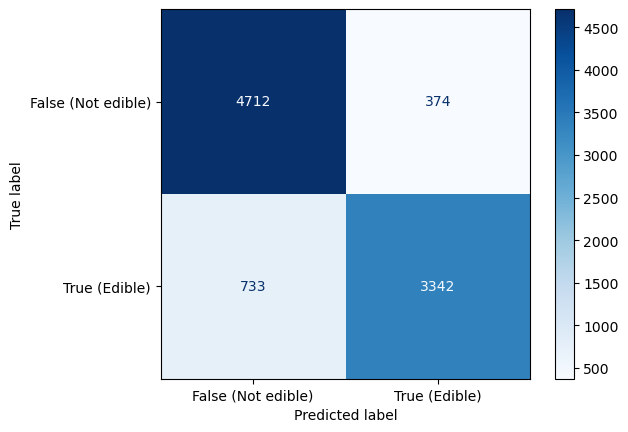

In [10]:
# The initial values are just chosen at random (based on what were the best parameters in assignment 3). They will need further "tuning".
random_forest_model = RandomForestClassifier(random_state=894, warm_start=True, oob_score=True, max_depth=10, min_samples_split=4, max_features=27, min_impurity_decrease=0.004, n_estimators=140, n_jobs=-1)
random_forest_model.fit(X_train, y_train)

random_forest_model_accuracy = random_forest_model.score(X_test, y_test)
random_forest_model_precision = precision_score(y_test, random_forest_model.predict(X_test), average=None)
random_forest_model_recall = recall_score(y_test, random_forest_model.predict(X_test), average=None)
random_forest_model_f1_score = f1_score(y_test, random_forest_model.predict(X_test), average='weighted')

print(f"Accuracy (Proportion of true positives and true negatives)              : {random_forest_model_accuracy}")
print(f"Precision (How many predicted positives are actual positives)           : {random_forest_model_precision} [False (Not edible), True (Edible)]")
print(f"Recall (How many actual positives were correctly predicted)             : {random_forest_model_recall} [False (Not edible), True (Edible)]")
print(f"F1 Score (Balance between precision and recall)                         : {random_forest_model_f1_score}")
print(f"Out-Of-Bag Score (A form of cross validation, using the unused samples) : {random_forest_model.oob_score_}")

random_forest_model_confusion_matrix = confusion_matrix(y_test, random_forest_model.predict(X_test))
classes = ["False (Not edible)", "True (Edible)"]
print("\nConfusion Matrix:")
dis = ConfusionMatrixDisplay(confusion_matrix=random_forest_model_confusion_matrix, display_labels=classes)
dis.plot(cmap='Blues')

The MOST important metric in evaluating this model must be the Precision score, since it indicates the amount of predicted positives (edibles) that are actually edible. A high precision score should be the ultimate goal for this model, since we're dealing mushrooms that might poison people - and even a single false positive (predicted to be edible, but is not) can cost a person his/her life.

Based on the above metrics, I can see that there are still about 14% if the predicted "NOT EDIBLE" mushrooms that were wrongly classified as EDIBLE, and about 10% of the predicted "EDIBLE" mushrooms that were wrongly classified as NOT EDIBLE.

This lack of precision is currently not sufficient, considering that about 10 - 14% of people who would use this model, would risk eating mushrooms that are in fact poisonous (wrongly classified).

Let's try to tune our parameters.

### Tuning the hyper-parameters

I will be using gridsearch to tune the random forest parameters.

I intend to perform multiple grid searches, iteratively getting closer to the optimal hyper parameters


In [8]:
# Define the initial parameters
param_grid = {
    'n_estimators': [20, 50, 80, 110, 140, 180, 220],
    'max_depth': [3, 6, 9],
    'min_impurity_decrease': [0, 0.005, 0.01, 0.05],
    'min_samples_split': [3, 6, 9, 12],
    'max_features': [10, 50, 100, 142],
    'random_state': [894]
}

# Perform the initial gridSearch: (Can be skipped on code re-runs, since this is simply used to 'get closer to' the optimal parameters).
grid_search1_randomForest = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='precision', verbose=2, n_jobs=-1)
grid_search1_randomForest.fit(X_train, y_train)
print(grid_search1_randomForest.best_params_)
print(grid_search1_randomForest.best_precision_)

C:\Users\krige\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krige\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krige\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krige\miniconda3\Lib\site-packages\sklearn\metrics\_

KeyboardInterrupt: 

It can be concluded that the parameters that provide the best precision, from the defined, are:

    'n_estimators'          :
    'max_depth'             :
    'min_impurity_decrease' :
    'min_samples_split'     :
    'max_features'          :
    'random_state'          :

Now I perform a second grid search cross validation around these parameters, to see if there are any other parameters that lie close by that improve the precision further.

In [ ]:
# Define the second iteration parameters: (Can be skipped on re-runs, since once run a single time we get the most optimal hyper-parameters (of the ones tested against)).
param_grid = {
    'n_estimators': [20, 40, 60, 80, 120, 140, 180, 200, 220],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_impurity_decrease': [0, 0.001, 0.002, 0.004, 0.008, 0.01, 0.02],
    'min_samples_split': [3, 5, 7, 9, 11],
    'max_features': [10, 20, 30, 40, 50, 60, 70],
    'random_state': [894]
}
#grid_search2_randomForest = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='precision')
#grid_search2_randomForest.fit(X_train, y_train)
#print(grid_search2_randomForest.best_params_)
#print(grid_search2_randomForest.best_precision_)

Based on the best parameters from above, I can now define the final Random Forest model to use for mushroom edibility prediction. I use the parameters found above.


In [ ]:
final_random_forest_model = RandomForestClassifier(random_state=894, warm_start=True, oob_score=True, max_depth=10, min_samples_split=4, max_features=27, min_impurity_decrease=0.004, n_estimators=140)
final_random_forest_model.fit(X_train, y_train)

final_random_forest_model_accuracy = random_forest_model.score(X_test, y_test)
final_random_forest_model_precision = precision_score(y_test, random_forest_model.predict(X_test), average=None)
final_random_forest_model_recall = recall_score(y_test, random_forest_model.predict(X_test), average=None)
final_random_forest_model_f1_score = f1_score(y_test, random_forest_model.predict(X_test), average='weighted')

print(f"Accuracy (Proportion of true positives and true negatives)              : {final_random_forest_model_accuracy}")
print(f"Precision (How many predicted positives are actual positives)           : {final_random_forest_model_precision} [False (Not edible), True (Edible)]")
print(f"Recall (How many actual positives were correctly predicted)             : {final_random_forest_model_recall} [False (Not edible), True (Edible)]")
print(f"F1 Score (Balance between precision and recall)                         : {final_random_forest_model_f1_score}")
print(f"Out-Of-Bag Score (A form of cross validation, using the unused samples) : {final_random_forest_model.oob_score_}")

random_forest_model_confusion_matrix = confusion_matrix(y_test, final_random_forest_model.predict(X_test))
classes = ["False (Not edible)", "True (Edible)"]
print("\nConfusion Matrix:")
dis = ConfusionMatrixDisplay(confusion_matrix=random_forest_model_confusion_matrix, display_labels=classes)
dis.plot(cmap='Blues')

### Conclusion: The Random Forest Model

I have now trained a complete random forest model for the prediction of the edibility of mushrooms from the data set. This involves:
1. the initial data **preparation** where most of the categorical columns with multiple categories were one hot encoded and missing data entries were noted as such (unknown).
2. The use of 1 classification model (Random Forest).
3. The evaluation and identification of the most important **performance metric** (Precision for the edible class of mushrooms) for this model.
4. "1.5" **validation methodologies** used during tuning, involving the use of gridSearchCV (Grid Search Cross Validation) and the Out-Of-Box parameter. GridSearchCV ensures cross validation through iterating through a number of different hyper-parameters to find the one which provides the best score (defined as 'precision' in my code) and the Out-Of-Box parameter provides the model with additional validation during training using the out-of-box samples (samples not chosen in the single decision tree training), where samples not used for training are used for validation.
5. The final confusion matrix shows that: INSERT TEXT

## Training the Linear Regression Model

During the training of the linear regression model, I will be focusing on these parameters and methodologies:
1. Training on the cleaned and prepared dataset.
2. Further separating the prepared data, manually dividing it into a train, test and validation set. With 60k+ samples that seems reasonable.
3. Training and tuning on the train and validation data and using the test data for final unbiased score evaluation.
4. Focussing on the 'precision' parameter in order to minimize the chance of reporting a mushroom that is poisonous as edible to the user.


In [11]:
# Preparing the data: Let's redefine our data, so we get 15% of the data for testing and 85% for training/validation, where 15% of the 85% are used for validation.

# Define the training/validation data and testing data. We use 85% for training/testing and 15% for validation:
X_trainValidate, X_test, y_trainValidate, y_test = train_test_split(X_features, y_target, test_size=0.15, random_state=894)

# Define the training data and validation data. We use 85% (of the 85%) for training and 15% (of the 85%) for validation:
X_train, X_validation, y_train, y_validation = train_test_split(X_trainValidate, y_trainValidate, test_size=0.15, random_state=894)

With the validation data, training data and testing data defined, I can now start building my logistic regression model:

Accuracy (Proportion of true positives and true negatives)              : 0.8611788878900732
Precision (How many predicted positives are actual positives)           : [0.87982334 0.83816356] [False (Not edible), True (Edible)]
Recall (How many actual positives were correctly predicted)             : [0.87031501 0.84962187] [False (Not edible), True (Edible)]
F1 Score (Balance between precision and recall)                         : 0.8612730132123165

Confusion Matrix:


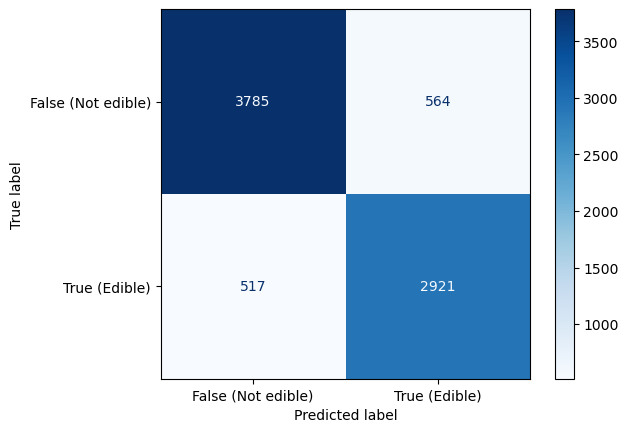

In [26]:
# The initial values are just chosen at random. They will need further "tuning". I use l2 regularization (ridge) to drive redundant coefficients towards 0.
# 'C' controls how much the model penalizes large coefficients. I should test values from 0.0001 to 1000 and see where the optimal C value is found for this data set.
log_reg_model = LogisticRegression(random_state=894, C=10, fit_intercept=True, penalty='l2', n_jobs=-1)
log_reg_model.fit(X_train, y_train)

log_reg_model_accuracy = log_reg_model.score(X_validation, y_validation)
log_reg_model_precision = precision_score(y_validation, log_reg_model.predict(X_validation), average=None)
log_reg_model_recall = recall_score(y_validation, log_reg_model.predict(X_validation), average=None)
log_reg_model_f1_score = f1_score(y_validation, log_reg_model.predict(X_validation), average='weighted')

print(f"Accuracy (Proportion of true positives and true negatives)              : {log_reg_model_accuracy}")
print(f"Precision (How many predicted positives are actual positives)           : {log_reg_model_precision} [False (Not edible), True (Edible)]")
print(f"Recall (How many actual positives were correctly predicted)             : {log_reg_model_recall} [False (Not edible), True (Edible)]")
print(f"F1 Score (Balance between precision and recall)                         : {log_reg_model_f1_score}")

log_reg_model_confusion_matrix = confusion_matrix(y_validation, log_reg_model.predict(X_validation))
classes = ["False (Not edible)", "True (Edible)"]
print("\nConfusion Matrix:")
dis = ConfusionMatrixDisplay(confusion_matrix=log_reg_model_confusion_matrix, display_labels=classes)
dis.plot(cmap='Blues')

Comment on initial results


### Tuning
For tuning I take inspiration from the Cross validation method, but instead of just using gridSearchCV to cross validate while searching, I will instead explicitely train the model on the training data, use the validation data to finetune and finally use the test data to get an unbiased evaluation of the models performance metrics.

In [ ]:
# Define the initial parameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'fit_intercept': [True, False],
    'penalty': [None, 'elasticnet', 'l1', 'l2'],
    'random_state': [894],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

# Now I'll be tuning it towards the most precise model (one with the least instances of mushrooms being classified as edible while being non-edible)
# This will be a costly algorithm, since I'll be checking each combination of each parameter.... but here goes...:
best_precision = 0
best_params = None
best_model = None

for C in param_grid['C']:
    for fit_intercept in param_grid['fit_intercept']:
        for penalty in param_grid['penalty']:
            if(penalty == 'elasticnet'):
                for l1_ratio in param_grid['l1_ratio']:
                  model = LogisticRegression(random_state=894, C=C, fit_intercept=fit_intercept, solver='saga', penalty=penalty, l1_ratio=l1_ratio, max_iter=1000, n_jobs=-1)
                  model.fit(X_train, y_train)
                  y_prediction = model.predict(X_validation)
                  precision_edible = precision_score(y_validation, y_prediction, average=None)[1]
                  if(precision_edible > precision_edible):
                      best_precision = precision_edible
                      best_params = {'C': C, 'fit_intercept': fit_intercept, 'penalty': penalty, 'l1_ratio': l1_ratio}
                      best_model = model
            else:
                solver = 'saga' if penalty == 'l1' else 'lbfgs'
                model = LogisticRegression(random_state=894, C=C, fit_intercept=fit_intercept, solver=solver, penalty=penalty, max_iter=1000, n_jobs=-1)
                model.fit(X_train, y_train)
                y_prediction = model.predict(X_validation)
                precision_edible = precision_score(y_validation, y_prediction, average=None)[1]
                if(precision_edible > precision_edible):
                    best_precision = precision_edible
                    best_params = {'C': C, 'fit_intercept': fit_intercept, 'penalty': penalty}
                    best_model = model

print(f"Finished tuning. Best model precision is {best_precision}\nBest parameters after tuning:\n{best_params}")

# Now I'll use the unbiased test data for a final scoring:
log_reg_model_accuracy = best_model.score(X_test, y_test)
log_reg_model_precision = precision_score(y_test, best_model.predict(X_test), average=None)
log_reg_model_recall = recall_score(y_test, best_model.predict(X_test), average=None)
log_reg_model_f1_score = f1_score(y_test, best_model.predict(X_test), average='weighted')

print(f"Accuracy (Proportion of true positives and true negatives)              : {log_reg_model_accuracy}")
print(f"Precision (How many predicted positives are actual positives)           : {log_reg_model_precision} [False (Not edible), True (Edible)]")
print(f"Recall (How many actual positives were correctly predicted)             : {log_reg_model_recall} [False (Not edible), True (Edible)]")
print(f"F1 Score (Balance between precision and recall)                         : {log_reg_model_f1_score}")

log_reg_model_confusion_matrix = confusion_matrix(y_test, best_model.predict(X_test))
classes = ["False (Not edible)", "True (Edible)"]
print("\nConfusion Matrix:")
dis = ConfusionMatrixDisplay(confusion_matrix=log_reg_model_confusion_matrix, display_labels=classes)
dis.plot(cmap='Blues')

C:\Users\krige\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
